In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [161]:
df = pd.read_csv("Surgical-deepnet.csv")
df.tail()

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,...,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
14630,18.79,14.1,1,0,1,0,0,0,0,0,...,-0.54,1,0,7.78,0,1,0,-0.16,1,1
14631,19.65,12.6,0,0,0,0,0,0,0,0,...,-1.42,4,0,8.40,6,1,0,-0.77,1,1
14632,14.84,12.6,1,0,0,0,0,0,0,0,...,0.65,0,0,13.25,3,3,0,0.99,1,1
14633,17.75,8.9,0,0,1,0,0,0,1,0,...,-0.50,0,1,8.30,5,0,0,0.17,1,1
14634,14.40,6.1,1,0,1,0,0,0,1,0,...,0.78,2,0,7.65,4,1,0,1.06,0,1


In [162]:
df.isnull().sum()

bmi                    0
Age                    0
asa_status             0
baseline_cancer        0
baseline_charlson      0
baseline_cvd           0
baseline_dementia      0
baseline_diabetes      0
baseline_digestive     0
baseline_osteoart      0
baseline_psych         0
baseline_pulmonary     0
ahrq_ccs               0
ccsComplicationRate    0
ccsMort30Rate          0
complication_rsi       0
dow                    0
gender                 0
hour                   0
month                  0
moonphase              0
mort30                 0
mortality_rsi          0
race                   0
complication           0
dtype: int64

In [163]:
X = df.drop('complication' ,axis=1).copy().values
Y = df['complication'].copy().values
# split the data into training and test sets

X_train ,X_test ,  Y_train , Y_test = train_test_split(X,Y ,shuffle=True, test_size=0.2)
#Y_train = Y_train.reshape(-1,1)
#Y_test = Y_test.reshape(-1,1)

X_train.shape ,X_test.shape ,Y_train.shape ,Y_test.shape

((11708, 24), (2927, 24), (11708,), (2927,))

In [164]:

class Perceptron :
    def __init__(self , learning_rate , input_length , Activation):
        self.learning_rate = learning_rate
        self.weights = np.random.rand(input_length)
        self.bias = np.random.rand(1)
        self.Activation = Activation

    def fit(self , X_train , Y_train ,X_test , Y_test, epochs):
        
        p = []
        q = []
        r = []
        z = []
        for epoch in tqdm(range(epochs)) :
            #for i in range(len(X_train)):
                #x = X_train[i]
                #y = Y_trin[i]
            for x , y in zip(X_train , Y_train ): 
                y_pred = x @ self.weights + self.bias

                y_pred = self.activation(y_pred , self.Activation)

                # forwarding finished
                error = y - y_pred
                self.weights = self.weights + (self.learning_rate * error * x)
                self.bias = self.bias + ( self.learning_rate * error)
            
            loss_train , acc_train = model.evaluate(X_train , Y_train)
            loss_test , acc_test = model.evaluate(X_test , Y_test)
            p.append(loss_train)
            q.append(acc_train)
            r.append(loss_test)
            z.append(acc_test)

        return p , q , r , z
    
           
    def activation(self, x , function):
        if function == "sigmoid" :
            return 1 / (1 + np.exp(-x)) 
        
        elif function == "relu" :
            return np.maximum(0 , x)
        
        elif function == "tanh" :
            return np.tanh(x)
        
        elif function == "linear" :
            return x 
        
        else :
            raise Exception("unknown activation function")



    def predict(self , X_test):
        Y_pred = []
        for x_test in X_test :
            y_pred = x_test @ self.weights + self.bias 
            y_pred = self.activation(y_pred , self.Activation)
            Y_pred.append(y_pred)

        return np.array(Y_pred)


    def calculate_loss(self, X_test , Y_test , metric):
        Y_pred = self.predict(X_test)
        if metric == "mse" :
            return np.mean(np.square(Y_test - Y_pred))
        elif metric == "mae" :
            return np.mean(np.abs(Y_test - Y_pred))
        elif metric == "rmse":
            return np.sqrt(np.mean(np.square( Y_test - Y_pred)))
        else :
            raise Exception("unknown metric")
        


    def calculate_accuracy(self , X_test , Y_test):
        Y_pred = self.predict(X_test)
        Y_pred = Y_pred.reshape(-1)
        Y_pred = np.where(Y_pred > 0.5  , 1 ,  0)      
        accuracy = np.sum(Y_pred == Y_test) / len(Y_test)
        return accuracy


    def evaluate(self , X_test , Y_test):

        loss = self.calculate_loss(X_test , Y_test , "mse")
        accuracy = self.calculate_accuracy(X_test , Y_test)
        
        return loss , accuracy

    


#model = Perceptron(learning_rate= 0.001 , input_length= X_train.shape[1] )
#model.fit(X_train , Y_train , epochs=256)


model = Perceptron(learning_rate=0.0001 , input_length= X_train.shape[1] , Activation= "linear")
p,q,r,z =model.fit(X_train , Y_train , X_test , Y_test , epochs=256)
# x * w + b  = y

# backpropagation = update w's and bias 
# error  = y - ypred

# methods : adam - rmsprob - SGD
# SGD = w = w + ( error * x * lr )
#    bias = b + ( error * lr )

  0%|          | 0/256 [00:00<?, ?it/s]

100%|██████████| 256/256 [15:58<00:00,  3.74s/it]


In [165]:
loss , accuracy = model.evaluate(X_test ,Y_test)
print("loss linear :" , loss)
print("accuracy linear :" , accuracy)

loss linear : 0.2282884032504698
accuracy linear : 0.7963785445848992


In [166]:
Y_pred = model.predict(X_test)
Y_pred = Y_pred.reshape(-1)
Y_pred = np.where(Y_pred > 0.5 , 1 , 0)

In [167]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test,Y_pred)

[Text(0, 0.5, 'Healthy'), Text(0, 1.5, 'sick')]

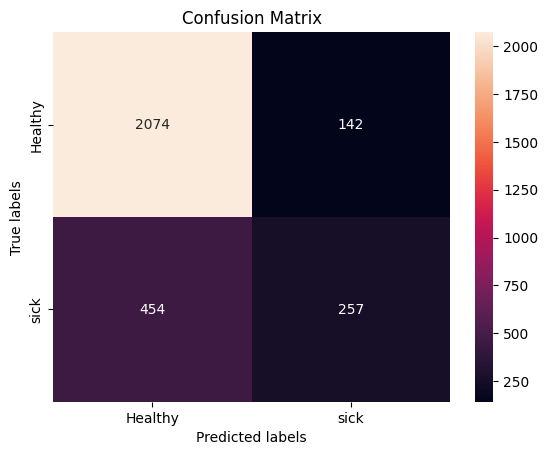

In [168]:
import seaborn as sns
import matplotlib.pyplot as plt


ax = plt.subplot()
sns.heatmap(cm , annot=True , fmt='g' , ax=ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Healthy' ,'sick'])
ax.yaxis.set_ticklabels(['Healthy' ,'sick'])

In [169]:
# precision and recall
from sklearn.metrics import precision_score,recall_score

print('Precision score with linear activation function :',precision_score(Y_test,Y_pred))
print('recall score with linear activation function :',recall_score(Y_test,Y_pred))

Precision score with linear activation function : 0.6441102756892231
recall score with linear activation function : 0.36146272855133615


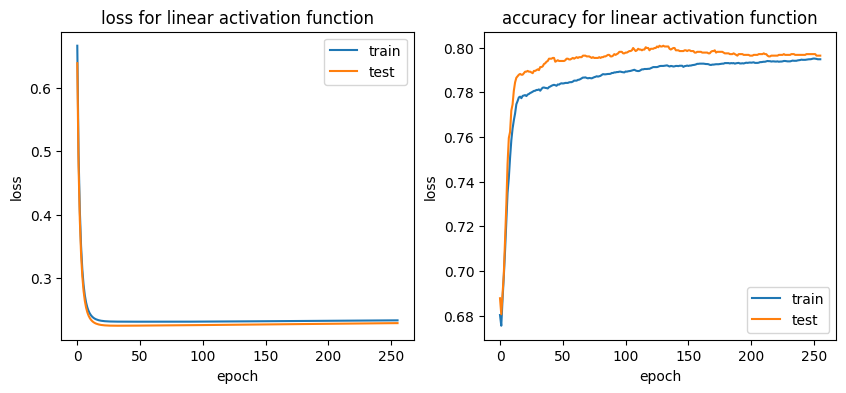

In [170]:
fig , (ax1 , ax2) = plt.subplots(1,2, figsize=(10,4))

ax1.plot(p)
ax1.plot(r)
ax1.set_xlabel("epoch")
ax1.set_ylabel("loss")
ax1.legend(["train" , "test"])
ax1.title.set_text(f'loss for linear activation function')

ax2.plot(q)
ax2.plot(z)
ax2.set_xlabel("epoch")
ax2.set_ylabel("loss")
ax2.legend(["train" , "test"])
ax2.title.set_text(f'accuracy for linear activation function')

plt.show()